# Wrangling and Analysis of WeRateDogs Twitter Archive by Cady Patino

## Gather

In [791]:
# load packages
import pandas as pd
import tweepy
import json
import numpy as np
import requests
import os

I first want to read in the twitter archive csv file provided by Udacity.

In [792]:
# read twitter archive csv file into dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

Next I want to programatically download the image predictions file from Udacity's servers.

In [793]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# confirm the request has succeeded (check http status code)
response

<Response [200]>

In [794]:
# create empty tsv vile and write contents of response to it
with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [795]:
# read tsv file into dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

Lastly, I want to gather additional data about these tweets using Twitter's API.

In [6]:
import tweepy

# removed keys and access tokens
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set authentication handler and wait parameters
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [81]:
# get list of all tweet ids
tweet_ids = twitter_archive['tweet_id'].values.tolist()

id_errors = [] # initialize list for ids with errors

# get tweet info (json) for all tweet ids in list and keep track of errors
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        print(tweet_id)
        with open('tweet_json.txt', 'a') as file:
            json.dump(tweet._json, file)
            file.write('\n')
    except tweepy.TweepError as e:
        print (e.reason)
        id_errors.append(tweet_id) # collect list of ids with errors

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270

Rate limit reached. Sleeping for: 232


878057613040115712
877736472329191424
877611172832227328
877556246731214848
877316821321428993
877201837425926144
876838120628539392
876537666061221889
876484053909872640
876120275196170240
875747767867523072
875144289856114688
875097192612077568
875021211251597312
874680097055178752
874434818259525634
874296783580663808
874057562936811520
874012996292530176
[{'code': 144, 'message': 'No status found with that ID.'}]
873580283840344065
873337748698140672
873213775632977920
872967104147763200
872820683541237760
872668790621863937
872620804844003328
872486979161796608
872261713294495745
872122724285648897
871879754684805121
871762521631449091
871515927908634625
871166179821445120
871102520638267392
871032628920680449
870804317367881728
870726314365509632
870656317836468226
870374049280663552
870308999962521604
870063196459192321
[{'code': 144, 'message': 'No status found with that ID.'}]
869772420881756160
869702957897576449
869596645499047938
869227993411051520
868880397819494401
868639

813812741911748608
813800681631023104
813217897535406080
813202720496779264
813187593374461952
813172488309972993
813157409116065792
813142292504645637
813130366689148928
813127251579564032
813112105746448384
813096984823349248
813081950185472002
813066809284972545
813051746834595840
812781120811126785
812747805718642688
812709060537683968
812503143955202048
812466873996607488
812372279581671427
811985624773361665
811744202451197953
811647686436880384
811627233043480576
811386762094317568
810984652412424192
810896069567610880
810657578271330305
810284430598270976
810254108431155201
809920764300447744
809808892968534016
809448704142938112
809220051211603969
809084759137812480
808838249661788160
808733504066486276
808501579447930884
808344865868283904
808134635716833280
808106460588765185
808001312164028416
807621403335917568
807106840509214720
807059379405148160
807010152071229440
806629075125202948
806620845233815552
806576416489959424
806542213899489280
806242860592926720
806219024703

756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
751830394383790080
751793661361422336
751598357617971201
751583847268179968
751538714308972544
751456908746354688
751251247299190784
751205363882532864
751132876104687617
750868782890057730
750719632563142656
750506206503038976
750429297815552001
750383411068534784
750381685133418496
750147208377409536
750132105863

Rate limit reached. Sleeping for: 619


750026558547456000
750011400160841729
749996283729883136
749981277374128128
749774190421639168
749417653287129088
749403093750648834
749395845976588288
749317047558017024
749075273010798592
749064354620928000
749036806121881602
748977405889503236
748932637671223296
748705597323898880
748699167502000129
748692773788876800
748575535303884801
748568946752774144
748346686624440324
748337862848962560
748324050481647620
748307329658011649
748220828303695873
747963614829678593
747933425676525569
747885874273214464
747844099428986880
747816857231626240
747651430853525504
747648653817413632
747600769478692864
747594051852075008
747512671126323200
747461612269887489
747439450712596480
747242308580548608
747219827526344708
747204161125646336
747103485104099331
746906459439529985
746872823977771008
746818907684614144
746790600704425984
746757706116112384
746726898085036033
746542875601690625
746521445350707200
746507379341139972
746369468511756288
746131877086527488
746056683365994496
745789745784

699072405256409088
699060279947165696
699036661657767936
698989035503689728
698953797952008193
698907974262222848
698710712454139905
698703483621523456
698635131305795584
698549713696649216
698355670425473025
698342080612007937
698262614669991936
698195409219559425
698178924120031232
697995514407682048
697990423684476929
697943111201378304
697881462549430272
697630435728322560
697616773278015490
697596423848730625
697575480820686848
697516214579523584
697482927769255936
697463031882764288
697270446429966336
697259378236399616
697255105972801536
697242256848379904
696900204696625153
696894894812565505
696886256886657024
696877980375769088
696754882863349760
696744641916489729
696713835009417216
696518437233913856
696490539101908992
696488710901260288
696405997980676096
696100768806522880
695816827381944320
695794761660297217
695767669421768709
695629776980148225
695446424020918272
695409464418041856
695314793360662529
695095422348574720
695074328191332352
695064344191721472
695051054296

675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206547968
675706639471788032
675534494439489536
675531475945709568
675522403582218240
675517828909424640
675501075957489664
675497103322386432
675489971617296384
675483430902214656
675432746517426176
675372240448454658
675362609739206656
675354435921575936
675349384339542016
675334060156301312
675166823650848770
675153376133427200
675149409102012420
675147105808306176
675146535592706048
675145476954566656
675135153782571009
675113801096802304


Rate limit reached. Sleeping for: 608


675111688094527488
675109292475830276
675047298674663426
675015141583413248
675006312288268288
675003128568291329
674999807681908736
674805413498527744
674800520222154752
674793399141146624
674790488185167872
674788554665512960
674781762103414784
674774481756377088
674767892831932416
674764817387900928
674754018082705410
674752233200820224
674743008475090944
674742531037511680
674739953134403584
674737130913071104
674690135443775488
674670581682434048
674664755118911488
674646392044941312
674644256330530816
674638615994089473
674632714662858753
674606911342424069
674468880899788800
674447403907457024
674436901579923456
674422304705744896
674416750885273600
674410619106390016
674394782723014656
674372068062928900
674330906434379776
674318007229923329
674307341513269249
674291837063053312
674271431610523648
674269164442398721
674265582246694913
674262580978937856
674255168825880576
674082852460433408
674075285688614912
674063288070742018
674053186244734976
674051556661161984
674045139690

666817836334096384
666804364988780544
666786068205871104
666781792255496192
666776908487630848
666739327293083650
666701168228331520
666691418707132416
666649482315059201
666644823164719104
666454714377183233
666447344410484738
666437273139982337
666435652385423360
666430724426358785
666428276349472768
666421158376562688
666418789513326592
666411507551481857
666407126856765440
666396247373291520
666373753744588802
666362758909284353
666353288456101888
666345417576210432
666337882303524864
666293911632134144
666287406224695296
666273097616637952
666268910803644416
666104133288665088
666102155909144576
666099513787052032
666094000022159362
666082916733198337
666073100786774016
666071193221509120
666063827256086533
666058600524156928
666057090499244032
666055525042405380
666051853826850816
666050758794694657
666049248165822465
666044226329800704
666033412701032449
666029285002620928
666020888022790149


In [796]:
# read json into dataframe
additional_twitter_info = pd.read_json('tweet_json.txt', lines=True)

In [797]:
# save dataframe to csv file
additional_twitter_info.to_csv('additional_twitter_info.csv')

## Assess

First, I'll assess the `twitter_archive` dataframe and I'll record the quality and tidiness issues I find.

In [843]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


From my initial visual assessment, I can see that some names are wrong (a, an, the, such, quite) or listed as 'None' (quality issue). Also, the timestamp column has day, month, and year all in the same column instead of parsed (tidiness issue).

I'll now move on to programmatic assessment.

In [799]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Here, I can see that timestamp is an integer instead of a datetime object (quality issue) and that tweet_id should be a string (quality issue). I can also see that the name, doggo, floofer, pupper, and puppo columns do not have any null values even though they have several rows listed as 'None'. Additionally, I see that in_reply_to_status_id and in_reply_to_user_id both have 78 non-null values, meaning that 78 of these tweets are replies to other tweets and need to be dropped from the analysis. Also, 181 of these entries are retweets and also need to be dropped, based on the 181 null values for retweeted_status_id and retweeted_status_user_id.

In [800]:
sum(twitter_archive.tweet_id.duplicated())

0

I ran the cell above to make sure there are no duplicated tweet ids in this table.

In [801]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [802]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Here, I can see that the minimum rating numerator is 0 and the max is 1776. Are these mistakes? Most of the values are between 8 and 12.

In [803]:
# query to get entry with rating numerator of 1776
twitter_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [804]:
twitter_archive.iloc[979].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

No, this does not appear to be a mistake, so the other high values are probably accurate as well.

In [805]:
# query to get entry with rating numerator of 1776
twitter_archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [806]:
twitter_archive.iloc[315].text

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

The zero rating does not appear to be a mistake either (I did not look at the second one at index 1016 because it is a retweet and will be dropped).

In [807]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [808]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Clearly, most of the denominators are 10. Are the other values mistakes?

In [809]:
twitter_archive.query('rating_denominator != 10 & in_reply_to_status_id.isnull()')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [810]:
# get list of indices for all non-zero denominators that aren't retweets
non_ten = twitter_archive.query('rating_denominator != 10 & in_reply_to_status_id.isnull()').index.values.tolist()

# print text string for these indices
for index in non_ten:
    print (index, twitter_archive.iloc[index].tweet_id, twitter_archive.iloc[index].text)

433 820690176645140481 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516 810984652412424192 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784 775096608509886464 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902 758467244762497024 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068 740373189193256964 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120 731156023742988288 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165 722974582966214656 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202 716439118184652

From querying and reading the texts above, I can see that the ratings with tweet_ids of 810984652412424192, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, and 666287406224695296 are wrong. The ratings were picked up from another fraction-looking number in the text. Therefore the denominators *and* numerators for these entries will need to be corrected.

In [811]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Toby          7
an            7
Daisy         7
Bailey        7
Buddy         7
Jax           6
Milo          6
Dave          6
Koda          6
Jack          6
Oscar         6
Rusty         6
Bella         6
Leo           6
Stanley       6
Scout         6
Alfie         5
           ... 
Jarod         1
Katie         1
Kial          1
Iroh          1
Venti         1
Marq          1
Vixen         1
JD            1
Ivar          1
Orion         1
Newt          1
Cermet        1
Howie         1
Dixie         1
Tanner        1
Winifred      1
Durg          1
Huck          1
Bubba         1
Walker        1
Laika         1
Kona          1
Tino          1
Anna          1
Billy         1
Moofasa       1
Chuck         1
Erik          1
Lulu          1
Rover         1
Name: name, Length: 957,

From the value counts above, I can confirm that there are many names wrongly listed as 'None' instead of NaN, along with some names that are articles (a, an, the) instead of names and are therefore wrong as well.

In [812]:
twitter_archive.query('doggo == "doggo" & floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [813]:
twitter_archive.iloc[200].text

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [814]:
twitter_archive.query('puppo == "puppo" & floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [815]:
twitter_archive.query('pupper == "pupper" & floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [816]:
twitter_archive.query('pupper == "pupper" & doggo == "doggo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [817]:
twitter_archive.query('pupper == "pupper" & puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


From the above cells, I see that that some tweets mention multiple things for doggo, pupper, puppo, or floofer. This seems to be mainly when there are multiple dogs in the tweet. These entries should be removed or corrected based on what their text suggests. Doggo, pupper, puppo, and floofer should then be variables in one column instead of separate columns (tidiness issue).

**`twitter_archive` quality issues:**
- some names are wrong (a, an, the, such quite) or are listed as 'None' instead of NaN (null)
- timestamp is int64 instead of datetime object
- tweet_id is int64 instead of a string
- doggo, floofer, pupper, and puppo have many values listed as 'None' instead of NaN (null)
- 78 of the tweets are replies to other tweets
- 181 of the tweets are retweets
- some entries have wrong ratings (numerator and denominator)
- some of these entries don't have an image associated with them (less entries in image_predictions dataset, found below)
- Missing data ('None' values in name and dog stage columns) - can't clean

**`twitter_archive tidiness` issues:**
- timestamp column has day, month, and year all in same column
- doggo, floofer, pupper, and puppo have their own columns instead being of variables in one single column (but some rows have two of these variables and need to be corrected first)

I'll now move on to assessing the `image_predictions` dataframe.

In [818]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


From my visual assessment, I see that this table has a tweet_id column that corresponds to the `twitter_archive` table; therefore the information in this `image_predictions` table should be part of the `twitter_archive` table (tidiness issue). Additionally, several columns (p1, p2, p3, p1_conf, p2_conf, p3_conf) have non-descriptive column headers and should be renamed appropriately (quality issue). I'll now assess the dataframe programmatically.

In [819]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are less entries in this dataset than in the `twitter_archive` table, which means some of the tweets in  `twitter_archive` don't have images associated with them. I added this as a quality issue in the list I made earlier for the `twitter_archive` dataset.

In [820]:
sum(image_predictions.tweet_id.duplicated())

0

I ran the cell above to make sure there are no duplicated tweet ids in this table.

In [821]:
image_predictions.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [822]:
image_predictions.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [823]:
image_predictions.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

The descriptive statistics above for p1_conf, p2_conf, and p3_conf all seem to make sense - it makes sense that the values decrease as the prediction number increases.

In [824]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [825]:
len(image_predictions.query('p1_dog == False'))

543

There are 543 entries in which the image prediction was not a dog breed. I'll dig into these a bit deeper by looking at some samples.

In [826]:
image_predictions.query('p1_dog == False').sample(random_state=42)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1975,870063196459192321,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,comic_book,0.534409,False,envelope,0.280722,False,book_jacket,0.043786,False


From the above query in which p1_dog is False, I sampled a tweet and then looked at the image by visiting the jpg_url. I can see that the image is of Clifford, a cartoon dog. Because it was not a picture of a real dog, the image prediction marked it as false in this case.

In [827]:
len(image_predictions.query('p1_dog == False & p2_dog == True'))

155

In [828]:
# sample a tweet from this query
image_predictions.query('p1_dog == False & p2_dog == True').sample(random_state=42)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1042,712438159032893441,https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg,1,ice_bear,0.869477,False,Great_Pyrenees,0.069457,True,Labrador_retriever,0.02474,True


Above, I queried the table for entries in which the p1_dog was False and the p2_dog was true, and then sampled from it to see what the image was like. In this particular sample, the image does appear to be a dog, despite the 87% p1 confidence that it's a bear instead.

In [829]:
len(image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == True'))

64

In [830]:
# sample a tweet from this query
image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == True').sample(random_state=42)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True


Above, I queried the table for entries in which the p1_dog and p2_dog are False and the p3_dog is true, and then sampled from it to see what the image was like. I looked at the image using the jpg_url. In this particular sample, the image is a dog, but clearly there are distractions in the image that lead to wrong predictions.

In [835]:
image_predictions.query('p1_conf <= 0.5').sample(random_state=42)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True


In the sample from the above query, we can see that the p1 prediction is wrong (it's not a pug, but another breed) and the p1_conf is low (less than 0.5) most likely because there is a horse in the picture that dominates the image, thereby making the prediction harder to make.

In [836]:
len(image_predictions.query('p1_dog == True & p1_conf > 0.5'))

973

Based on my queries and random samplings above, it's clear that the image predictions are not always correct, most likely due to distractions in the image or pictures of unreal dogs. For my analysis, I will only analyze entries in which the p1_ dog is True and the p1_conf is greater than 0.5 in order to minimize the number of wrongful predictions.

**`image_predictions` quality issues:**
- non-descriptive column headers (p1, p2, p3, p1_conf, p2_conf, p3_conf)
- many false predictions and low confidence levels

**`image_predictions` tidiness issues:**
- `image_predictions` table should be part of `twitter_archive` table


I'll now move on to assessing my final dataset, the `additional_twitter_info` table.

In [837]:
additional_twitter_info

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38850,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8608,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33278,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6321,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25074,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4195,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42234,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8719,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40376,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9489,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20244,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3138,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11868,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2092,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",65640,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,19081,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27807,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4308,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31986,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7484,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


From initial visual assessment, I can see that there are many columns in this table that are also in the `twitter_archive table` - these duplicated columns should be deleted from this table (tidiness issue). From programmatic assessment below, I'll be able to know exactly how many columns are duplicated.

In [838]:
additional_twitter_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [840]:
# show duplicated column
all_columns = pd.Series(list(additional_twitter_info) + list(twitter_archive))
all_columns[all_columns.duplicated()]

32    in_reply_to_status_id
33      in_reply_to_user_id
35                   source
dtype: object

I need to delete duplicated columns displayed from the cell above, as well as some other columns that are named differently in this table. In total, the duplicated columns that need to be deleted are: 'created_at', 'source','full_text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id_str', 'in_reply_to_usr_id_str' and 'retweeted_status'. (tidiness issue).

The desired columns from this table should be merged with the `twitter_archive` table, such as 'favorite_count' and 'retweet_count' (tidiness). The int datatypes for these columns are appropriate. In this table, the tweet id column is called 'id' instead of 'tweet_id' (quality issue). This needs to be changed to 'tweet_id' in order to merge with the `twitter_archive` table. 

In [844]:
additional_twitter_info.favorite_count.describe()

count      2345.000000
mean       8077.829424
std       12153.476849
min           0.000000
25%        1405.000000
50%        3544.000000
75%        9987.000000
max      143552.000000
Name: favorite_count, dtype: float64

In [845]:
additional_twitter_info.retweet_count.describe()

count     2345.000000
mean      3030.373561
std       5040.584448
min          0.000000
25%        606.000000
50%       1415.000000
75%       3532.000000
max      77467.000000
Name: retweet_count, dtype: float64

In [846]:
additional_twitter_info.query('retweet_count == 77467')

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1028,NaN,NaN,2016-06-18 18:26:18,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 744234667679821824, 'id_str'...",128454,False,Here's a doggo realizing you can stand in a po...,NaN,...,0.0,NaN,NaN,NaN,77467,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [847]:
additional_twitter_info.iloc[1028].full_text

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

The descriptive statistics above appear fine. Below is my short list of quality and tidiness issues for this dataset.

**`additional_twitter_info` quality issues:**
- tweet id column is named 'id' instead of 'tweet_id'


**`additional_twitter_info` tidiness issues:**
- many columns duplicated from `twitter_archive` table 
- desired columns (favorite_count, retweet_count) from this table should be merged with the `twitter_archive` table

Here is the full list of the combined quality and tidiness issues from all three tables. I'll now move on to the cleaning steps.

**Quality issues:**

`twitter_archive`:
- some names are wrong (a, an, the, such, quite) or are listed as 'None' instead of NaN (null)
- timestamp is int64 instead of datetime object
- doggo, floofer, pupper, and puppo have many values listed as 'None' instead of NaN (null)
- 78 of the tweets are replies to other tweets
- 181 of the tweets are retweets
- retweet and reply columns can be deleted once reply and retweet entries are dropped
- some entries have wrong ratings (numerator and denominator)
- some of these entries don't have an image associated with them (less entries in image_predictions dataset, found below)

**`image_predictions` quality issues:**
- non-descriptive column headers (p1, p2, p3, p1_conf, p2_conf, p3_conf)
- many false predictions and low confidence levels

`additional_twitter_info`:
- tweet id column is named 'id' instead of 'tweet_id'



**Tidiness issues:**
- timestamp column in `twitter_archive` has day, month, and year all in same column
- doggo, floofer, pupper, and puppo in `twitter_archive` have their own columns instead being of variables in one single column
- `image_predictions` table should be part of `twitter_archive` table
- many columns from `twitter_archive` table duplicated in `additional_twitter_info` table
- desired columns (favorite_count, retweet_count) from `additional_twitter_info` should be merged with the `twitter_archive` table

## Clean

In [915]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
additional_twitter_info_clean = additional_twitter_info.copy()

### Keep only original tweets (no retweets or replies) and ones that have images

#### Some tweets don't have images associated with them.

##### Define

Drop tweet_id's in `twitter_archive_clean` table that are not in the `image_predictions_clean` table.

##### Code

In [916]:
all_ids = twitter_archive_clean.tweet_id.values.tolist()
ids_with_image = image_predictions_clean.tweet_id.values.tolist()

In [917]:
# create list of ids to drop from twitter_archive_clean
ids_to_drop = []

for id in all_ids:
    if id not in ids_with_image:
        ids_to_drop.append(id)

len(ids_to_drop)

281

In [918]:
len(twitter_archive_clean)

2356

In [919]:
for index, row in twitter_archive_clean.iterrows():
    if row['tweet_id'] in ids_to_drop:
        twitter_archive_clean.drop(index, inplace=True)

##### Test

In [920]:
len(twitter_archive_clean)

2075

In [921]:
# confirm list of tweet ids are the same for both tables using set()

x = twitter_archive_clean.tweet_id.values.tolist()
y = image_predictions_clean.tweet_id.values.tolist()

set(x) == set(y)

True

#### Some tweets are replies and some tweets are retweets.

##### Define

Delete the entries that have a value for retweeted_status_id (181 rows) and in_reply_to_status_id (78 rows).

##### Code

In [922]:
import numpy as np

In [923]:
# drop rows that have a finite value for retweet_status_id
retweet_indices = twitter_archive_clean[np.isfinite(twitter_archive_clean.retweeted_status_id)].index
twitter_archive_clean = twitter_archive_clean.drop(retweet_indices)

In [924]:
# drop rows that have a finite value for in_reply_to_status_id
reply_indices = twitter_archive_clean[np.isfinite(twitter_archive_clean.in_reply_to_status_id)].index
twitter_archive_clean = twitter_archive_clean.drop(reply_indices)

In [925]:
twitter_archive_clean.reset_index(drop=True, inplace=True)

##### Test

In [926]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 17 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: float64(4), int64(3), object(10)

Confirmed that retweet and reply columns now have 0 non-null values.

### Tidiness

#### Timestamp column in `twitter_archive` has day, month, and year all in same column

##### Define

Convert timestamp column to datetime datatype (quality issue) and then parse the month, and year into separate columns using datetime library.

##### Code

In [927]:
from datetime import datetime as dt

In [928]:
# convert timestamp column to datetime data type
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [929]:
# parse year and month from datetime into separate columns
twitter_archive_clean['year'] = twitter_archive_clean.timestamp.dt.year
twitter_archive_clean['month'] = twitter_archive_clean.timestamp.dt.month

##### Test

In [930]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 19 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
year                          19

In [931]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,8
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017,7
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017,7
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017,7


#### One variable (dog stage) in four columns (doggo, floofer, pupper, and puppo) in `twitter_archive` table.

##### Define

Delete or correct rows with more than one value for dog stage and then make doggo, floofer, pupper, and puppo as variables in a column called 'dog_stage' using melt function.

##### Code

In [932]:
twitter_archive_clean.query('doggo == "doggo" & floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
152,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,2017,4


In [933]:
twitter_archive_clean.iloc[152].text

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

The entry above is actually of an owl instead of a dog, so I'll drop it from the dataset.

In [934]:
twitter_archive_clean.drop(152, inplace=True)
twitter_archive_clean.reset_index(drop=True, inplace=True)

In [935]:
twitter_archive_clean.query('doggo == "doggo" & puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
146,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,2017,4


In [936]:
twitter_archive_clean.iloc[146].text

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

I'll change the entry above to 'puppo' only, instead of both 'puppo' and 'doggo' based on the fact that it's first called a puppo and the doggo is describing the agenda.

In [937]:
twitter_archive_clean.at[146,'doggo'] = 'None'

In [938]:
# confirm
twitter_archive_clean.iloc[146].doggo

'None'

In [939]:
twitter_archive_clean.query('doggo == "doggo" & pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
336,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,2017,1
393,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None,2016,12
420,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,2016,11
505,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,2016,10
647,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None,2016,7
699,751583847268179968,NaN,NaN,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None,2016,7
788,741067306818797568,NaN,NaN,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None,2016,6
834,733109485275860992,NaN,NaN,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None,2016,5


In [940]:
twitter_archive_clean.iloc[336].text

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

Looks like the above entry should be set to none for all dog stages.

In [941]:
twitter_archive_clean.at[336,'doggo'] = 'None'
twitter_archive_clean.at[336,'pupper'] = 'None'

In [942]:
twitter_archive_clean.loc[420].text

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

For this entry, it appears that Bones is referred to as a pupper and the other dog is a doggo, so I'll set doggo to 'None'.

In [943]:
twitter_archive_clean.at[420,'doggo'] = 'None'

In [944]:
twitter_archive_clean.loc[505].text

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

The entry above should just be doggo and not pupper. I'll change the value for pupper to 'None'.

In [945]:
twitter_archive_clean.at[505,'pupper'] = 'None'

In [946]:
twitter_archive_clean.loc[699].text

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

This entry should be 'None' for all dog stages.

In [947]:
twitter_archive_clean.at[699,'pupper'] = 'None'
twitter_archive_clean.at[699,'doggo'] = 'None'

In [948]:
twitter_archive_clean.loc[788].text

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

The above tweet and the rest of the tweets from visual inspection of the query appear to have two dogs in them. I'll drop these before moving on (entries 393, 647, 788, 834).

In [949]:
twitter_archive_clean.drop([393,647,788,834], inplace=True)
twitter_archive_clean.reset_index(drop=True, inplace=True)

In [950]:
twitter_archive_clean.query('puppo == "puppo" & pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month


In [951]:
twitter_archive_clean.query('floofer == "floofer" & pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month


In [952]:
twitter_archive_clean.query('puppo == "puppo" & floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month


Now all entries should be associated with only one of the dog stages, or none at all (i.e. doggo, floofer, pupper, or puppo).

In [953]:
# get list of all column_names
column_names = twitter_archive_clean.columns.values.tolist()

# define value variables
value_vars = ['doggo', 'floofer', 'pupper', 'puppo']

# remove value variables from column name list to get id_vars
id_vars = column_names
for x in value_vars:
    id_vars.remove(x)

# melt value variables into one column
melted = twitter_archive_clean.reset_index().melt(id_vars = id_vars, value_vars = value_vars, var_name=['dog_stage'])

In [954]:
melted.value.value_counts()

None       7568
pupper      202
doggo        64
puppo        23
floofer       7
Name: value, dtype: int64

In [955]:
# Delete duplicated rows with 'None' values in value column
melted = melted.drop(melted.query('dog_stage == "puppo" & value == "None"').index)
melted = melted.drop(melted.query('dog_stage == "pupper" & value == "None"').index)
melted = melted.drop(melted.query('dog_stage == "floofer" & value == "None"').index)

In [956]:
melted.value.value_counts()

None       1902
pupper      202
doggo        64
puppo        23
floofer       7
Name: value, dtype: int64

In [957]:
# check number of entries with no dog stage in pre-melted dataset - this is what we should have for 'None'
len(twitter_archive_clean.query('pupper == "None" & doggo == "None" & floofer == "None" & puppo == "None"'))

1670

In [958]:
# check number of duplicated tweet_ids
sum(melted.tweet_id.duplicated())

232

In [959]:
# drop rows with duplicated tweet_ids, keep last
melted = melted.drop(melted[melted.tweet_id.duplicated(keep='last')].index)

In [960]:
# number for 'None' should now match length above (1670)
melted.value.value_counts()

None       1670
pupper      202
doggo        64
puppo        23
floofer       7
Name: value, dtype: int64

In [961]:
# confirm there are no longer duplicated tweet_ids
sum(melted.tweet_id.duplicated())

0

In [962]:
# confirm length of melted - should be 1966 now after dropping 5 rows
len(melted)

1966

In [963]:
# drop dog_stage column
melted.drop(columns='dog_stage', inplace=True)

In [964]:
# rename value column to 'dog_stage'
melted = melted.rename(columns={'value':'dog_stage'})
melted.reset_index(drop=True, inplace=True)

In [965]:
# set twitter_archive_clean equal to copy of melted dataset
twitter_archive_clean = melted.copy()

##### Test

In [966]:
twitter_archive_clean.dog_stage.value_counts()

None       1670
pupper      202
doggo        64
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [967]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 16 columns):
tweet_id                      1966 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1966 non-null datetime64[ns]
source                        1966 non-null object
text                          1966 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1966 non-null object
rating_numerator              1966 non-null int64
rating_denominator            1966 non-null int64
name                          1966 non-null object
year                          1966 non-null int64
month                         1966 non-null int64
dog_stage                     1966 non-null object
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 245.8+ KB


#### `image_predictions` table should be part of `twitter_archive` table.

##### Define

First correct quality issue in `image_prediction` table by renaming non-descriptive column names and then add `image_prediction_clean` columns to `twitter_archive_clean` table by merging the two dataframes on tweet_id.

##### Code

In [968]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [969]:
# rename non-descriptive columns in image prediction table
image_predictions_clean.rename(columns={'p1':'breed_prediction1', 'p2':'breed_prediction2',
                                        'p3':'breed_prediction3', 'p1_conf':'prediction1_confidence',
                                        'p2_conf':'prediction2_confidence', 
                                        'p3_conf':'prediction3_confidence',
                                        'p1_dog':'prediction1_is_dog', 'p2_dog':'prediction2_is_dog',
                                        'p3_dog':'prediction3_is_dog'}, 
                               inplace=True)


In [970]:
# merge together on 'tweet_id'
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id', how='left')

##### Test

In [971]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1965
Data columns (total 27 columns):
tweet_id                      1966 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1966 non-null datetime64[ns]
source                        1966 non-null object
text                          1966 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1966 non-null object
rating_numerator              1966 non-null int64
rating_denominator            1966 non-null int64
name                          1966 non-null object
year                          1966 non-null int64
month                         1966 non-null int64
dog_stage                     1966 non-null object
jpg_url                       1966 non-null object
img_num                       1966

In [972]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,breed_prediction1,prediction1_confidence,prediction1_is_dog,breed_prediction2,prediction2_confidence,prediction2_is_dog,breed_prediction3,prediction3_confidence,prediction3_is_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Desired columns (favorite_count, retweet_count) from `additional_twitter_info` should be part of the `twitter_archive` table.

##### Define

First rename 'id' column in `additional_twitter_info_clean` table to 'tweet_id' and then merge favorite_count and retweet_count columns with `twitter_archive_clean`.

##### Code

Note, `additional_twitter_info_clean` has two id columns: id, which is in integer format, and id_str which is in string format. I'll rename both to be more descriptive, but I need to merge on the integer format since I haven't yet converted the tweet_id column in `twitter_archive` to string.

In [973]:
# rename 'id' and 'id_str' column to 'tweet_id'
additional_twitter_info_clean = additional_twitter_info_clean.rename(columns={'id':'tweet_id'})
additional_twitter_info_clean = additional_twitter_info_clean.rename(columns={'id_str':'tweet_id_str'})

In [974]:
# select only desired 3 columns to merge
additional_info_subset = additional_twitter_info_clean.loc[:,['tweet_id', 'favorite_count', 'retweet_count']]

# merge with twitter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, additional_info_subset, on='tweet_id', how='left')

##### Test

In [975]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1965
Data columns (total 29 columns):
tweet_id                      1966 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1966 non-null datetime64[ns]
source                        1966 non-null object
text                          1966 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1966 non-null object
rating_numerator              1966 non-null int64
rating_denominator            1966 non-null int64
name                          1966 non-null object
year                          1966 non-null int64
month                         1966 non-null int64
dog_stage                     1966 non-null object
jpg_url                       1966 non-null object
img_num                       1966

In [976]:
twitter_archive_clean.favorite_count.describe()

count      1966.000000
mean       8893.420142
std       12627.004618
min          79.000000
25%        1930.000000
50%        4049.500000
75%       11179.000000
max      143552.000000
Name: favorite_count, dtype: float64

In [977]:
twitter_archive_clean.retweet_count.describe()

count     1966.000000
mean      2731.735504
std       4717.107825
min         13.000000
25%        609.500000
50%       1323.500000
75%       3138.000000
max      77467.000000
Name: retweet_count, dtype: float64

#### Duplicated columns from `twitter_archive` table in `additional_twitter_info` table

##### Define

Drop the following columns from `additional_twitter_info` that are already in `twitter_archive`: 'created_at', 'source','full_text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str' and 'retweeted_status'.

##### Code

In [981]:
dupl_columns = ['created_at', 'source','full_text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'retweeted_status']

additional_twitter_info_clean.drop(columns=dupl_columns, inplace=True)
                                   

##### Test

In [982]:
additional_twitter_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 23 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
geo                              0 non-null float64
tweet_id                         2345 non-null int64
tweet_id_str                     2345 non-null int64
in_reply_to_screen_name          78 non-null object
is_quote_status                  2345 non-null bool
lang                             2345 non-null object
place                            1 non-null object
possibly_sensitive               2207 non-null float64
possibly_sensitive_appealable    2207 non-null float64
quoted_status                    25 non-null 

### Quality - correct remaining quality issues

#### `twitter_archive`: wrong names in 'name' column and many listed as 'None'

##### Define

Convert names listed as 'a', 'an', 'the', 'such', 'quite' or 'None' to null by applying a function to the column.

##### Code

In [983]:
# list names to correct
wrong_names = ['a', 'an', 'the', 'such', 'quite','None']

# define function to replace wrong names with a null value
def replace_name(name):
    if name in wrong_names:
        return None
    else:
        return name

In [984]:
# apply function to name column in dataframe
twitter_archive_clean['name'] = twitter_archive_clean['name'].apply(replace_name)

##### Test

In [985]:
# should return zero
sum(twitter_archive_clean.name.isin(wrong_names))

0

In [986]:
# confirm that there are many null values now
sum(twitter_archive_clean.name.isnull())

593

#### `twitter_archive`: tweet_id is int64 instead of a string

##### Define

Convert tweet_id values to strings using .astype function.

##### Code

In [987]:
# convert tweet_id to string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

##### Test

In [988]:
# should now be datatype 'O' for string object
twitter_archive_clean.tweet_id.dtype

dtype('O')

#### `twitter_archive`: dog_stage column has many values listed as 'None' instead of NaN (null)


##### Define

Convert dog_stage values listed as 'None' to null by applying a function to the column.

##### Code

In [989]:
# define function to convert 'None' strings to NaN (null)
def none_to_null(value):
    if value == 'None':
        return None
    else:
        return value

In [990]:
# apply function to dog_stage column in dataframe
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].apply(none_to_null)

##### Test

In [991]:
# should not return any 'None' counts
twitter_archive_clean.dog_stage.value_counts()

pupper     202
doggo       64
puppo       23
floofer      7
Name: dog_stage, dtype: int64

In [992]:
# confirm that there are many null values now
sum(twitter_archive_clean.dog_stage.isnull())

1670

#### `twitter_archive`: Retweet and reply columns are now null for every row

##### Define

Delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns from `twitter_archive_clean`.

##### Code

In [993]:
drop_columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
              'retweeted_status_timestamp']

twitter_archive_clean.drop(columns=drop_columns, inplace=True)

##### Test

In [994]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1965
Data columns (total 24 columns):
tweet_id                  1966 non-null object
timestamp                 1966 non-null datetime64[ns]
source                    1966 non-null object
text                      1966 non-null object
expanded_urls             1966 non-null object
rating_numerator          1966 non-null int64
rating_denominator        1966 non-null int64
name                      1373 non-null object
year                      1966 non-null int64
month                     1966 non-null int64
dog_stage                 296 non-null object
jpg_url                   1966 non-null object
img_num                   1966 non-null int64
breed_prediction1         1966 non-null object
prediction1_confidence    1966 non-null float64
prediction1_is_dog        1966 non-null bool
breed_prediction2         1966 non-null object
prediction2_confidence    1966 non-null float64
prediction2_is_dog        1966 non-null bool


#### `twitter_archive`: Some entries have ratings that are wrong

##### Define

Correct the ratings for the following tweet ids (if they are still in the table) based on their corresponding texts: 810984652412424192, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, and 666287406224695296 .

##### Code

In [995]:
# list of ids that have incorrect ratings
ids = ['810984652412424192', '740373189193256964', '722974582966214656', 
       '716439118184652801', '682962037429899265', '666287406224695296']

# display the entries for these tweet ids to confirm they're still in there
twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(ids)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,...,prediction1_confidence,prediction1_is_dog,breed_prediction2,prediction2_confidence,prediction2_is_dog,breed_prediction3,prediction3_confidence,prediction3_is_dog,favorite_count,retweet_count
347,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,2016,12,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,5829,1610
712,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,2016,6,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,37223,14641
786,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,2016,4,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4388,1716
815,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,2016,4,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2520,240
1140,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,2016,1,...,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,39774,18422
1713,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,None,2015,11,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,150,68


In [996]:
twitter_archive_clean.iloc[347].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

I'll drop this row because it doesn't have a rating, but I'll do it after correcting the other indices first.

In [997]:
twitter_archive_clean.iloc[712].text

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [998]:
# change this rating to 14/10
twitter_archive_clean.at[712,'rating_numerator'] = 14
twitter_archive_clean.at[712,'rating_denominator'] = 10

In [999]:
twitter_archive_clean.iloc[786].text

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [1000]:
# change this rating to 13/10
twitter_archive_clean.at[786,'rating_numerator'] = 13
twitter_archive_clean.at[786,'rating_denominator'] = 10

In [1001]:
twitter_archive_clean.iloc[815].text

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [1002]:
# change this rating to 11/10
twitter_archive_clean.at[815,'rating_numerator'] = 11
twitter_archive_clean.at[815,'rating_denominator'] = 10

In [1003]:
twitter_archive_clean.iloc[1140].text

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [1004]:
# change this rating to 10/10
twitter_archive_clean.at[1140,'rating_numerator'] = 10
twitter_archive_clean.at[1140,'rating_denominator'] = 10

In [1005]:
twitter_archive_clean.iloc[1713].text

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [1006]:
# change this rating 9/10
twitter_archive_clean.at[1713,'rating_numerator'] = 9
twitter_archive_clean.at[1713,'rating_denominator'] = 10

In [1007]:
# Now drop row at index 347 since it has no rating
twitter_archive_clean.drop(347, inplace=True)

twitter_archive_clean.reset_index(drop=True, inplace=True)

##### Test

In [1008]:
twitter_archive_clean.rating_numerator.value_counts()

12      442
10      418
11      392
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
26        1
420       1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [1009]:
twitter_archive_clean.rating_denominator.value_counts()

10     1954
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [1010]:
# should print 5 of the 6 tweet ids in ids with their new ratings
for index, row in twitter_archive_clean.iterrows():
    if row['tweet_id'] in ids:
        print (row['tweet_id'], row['rating_numerator'], row['rating_denominator'])

740373189193256964 14 10
722974582966214656 13 10
716439118184652801 11 10
682962037429899265 10 10
666287406224695296 9 10


In [1012]:
# should be 1965 now
len(twitter_archive_clean)

1965

I am now ready to save this cleaned data into a master csv file.

In [1013]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analysis and Visualization

In [1014]:
from matplotlib import pyplot as plt
% matplotlib inline

In [1015]:
# get table of number of occurences for each dog stage
dog_stage_counts = twitter_archive_clean.groupby('dog_stage').count()['tweet_id'].reset_index()

# rename tweet_id to 'counts'
dog_stage_counts = dog_stage_counts.rename(columns={'tweet_id':'counts'})

# sort by counts
dog_stage_counts = dog_stage_counts.sort_values(by=['counts'], ascending=False)
dog_stage_counts

,dog_stage,counts
2,pupper,202
0,doggo,64
3,puppo,23
1,floofer,7


In [1016]:
import seaborn as sns
sns.set_style('darkgrid')

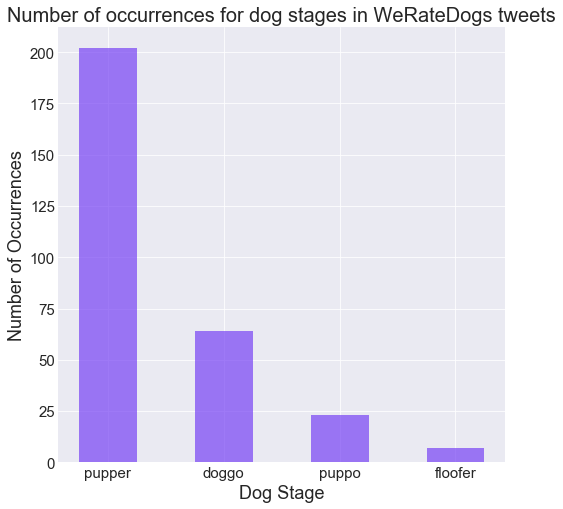

In [1017]:
# set plot labels
labels = dog_stage_counts.dog_stage.values.tolist()

# set bar heights
heights = dog_stage_counts.counts.values.tolist()

ind = np.arange(len(labels)) # the x locations for the groups
width = 0.5 # the width of the bars

plt.figure(figsize=(8, 8))  # width:8, height:8

# plot bars
bars = plt.bar(ind, heights, width, color='#7742f4', alpha=0.7)

# title and labels
plt.ylabel('Number of Occurrences', size=18)
plt.xlabel('Dog Stage', size=18)
plt.title('Number of occurrences for dog stages in WeRateDogs tweets', size=20)
plt.xticks(ind, labels, size=15, ha='center')
plt.yticks(size=15);

Of the tweets that characterized the dog as a dog stage, pupper was the most common dog stage, followed by doggo. Floofer had the least with only 7 occurences. I now want to explore how mean favorite count and mean retweet count compare across dog stages.

In [1018]:
# group by dog_stage and get mean values for 'favorite_count'
dog_stage_means = twitter_archive_clean.groupby('dog_stage').mean()[['favorite_count','retweet_count']].reset_index()

# merge with counts table above
grouped_dog_stage = dog_stage_counts.merge(dog_stage_means, how='left', on = 'dog_stage')
grouped_dog_stage

,dog_stage,counts,favorite_count,retweet_count
0,pupper,202,7213.123762,2336.876238
1,doggo,64,18900.484375,6863.218750
2,puppo,23,23345.173913,7011.000000
3,floofer,7,12947.714286,4823.571429


I'm now ready to plot the means for each dog stage using the table I created above.

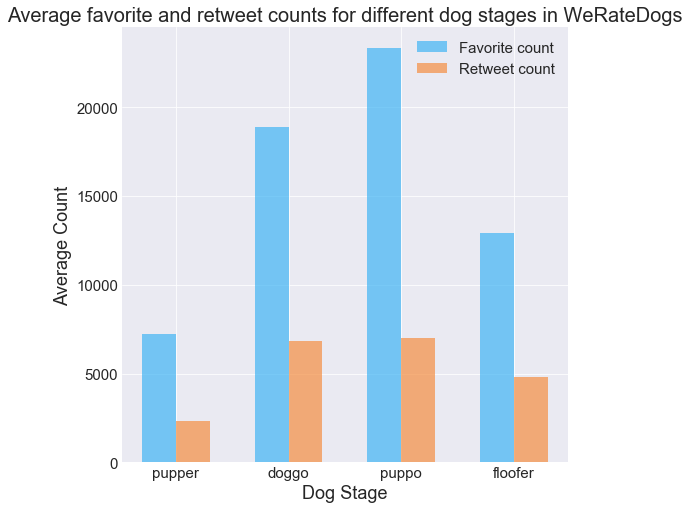

In [1019]:
# set plot labels
labels = grouped_dog_stage.dog_stage.tolist()

# set bar heights
favorite_means = grouped_dog_stage.favorite_count.tolist()
retweet_means = grouped_dog_stage.retweet_count.tolist()

ind = np.arange(len(labels)) # the x locations for the groups
width = 0.3 # the width of the bars

plt.figure(figsize=(8, 8))  # width:8, height:8

# plot bars
favorite_bars = plt.bar(ind, favorite_means, width, color='#41b5f4', alpha=0.7, label='Favorite count')
retweet_bars = plt.bar(ind + width, retweet_means, width, color='#f48e41', alpha=0.7, label='Retweet count')

# title and labels
plt.ylabel('Average Count', size=18)
plt.xlabel('Dog Stage', size=18)
plt.title('Average favorite and retweet counts for different dog stages in WeRateDogs', size=20)
locations = ind + width / 2  # xtick locations
plt.xticks(locations, labels, size=15, ha='center')
plt.yticks(size=15)

# legend
plt.legend(loc=0, prop={'size': 15});

The plot above shows that puppos have the highest average favorite count and highest retweet count. Puppers have the lowest. The trends appear to be the same for both favorite count and retweet count.

In [1021]:
# query dataset for only predicted dogs and high confidence levels
dogs_confident = twitter_archive_clean.query('prediction1_is_dog == True & prediction1_confidence > 0.5')

len(dogs_confident)

925

925 of the tweets predicted a dog from the picture with a confidence level greater than 0.5. I'll use these specific tweets to compare favorite counts, retweet counts, and ratings across the highest occurring dog breeds.

In [1022]:
# group by breed_prediction1 and then sort by counts
dogs_confident_grouped = dogs_confident.groupby('breed_prediction1').count()['tweet_id'].reset_index()
dogs_confident_grouped.sort_values('tweet_id', ascending=False).head(20)

,breed_prediction1,tweet_id
78,golden_retriever,112
42,Pembroke,70
32,Labrador_retriever,64
12,Chihuahua,46
90,pug,43
48,Samoyed,30
43,Pomeranian,29
70,chow,26
95,toy_poodle,23
19,French_bulldog,22


I'll take the top 10 occurring breeds and analyze them more.

In [1023]:
# get table of top 10 most frequent breeds
most_frequent_breeds_counts = dogs_confident_grouped.sort_values('tweet_id', ascending=False).reset_index(drop=True).iloc[0:10]

# rename tweet_id to 'counts'
most_frequent_breeds_counts.rename(columns={'tweet_id':'counts'}, inplace=True)
most_frequent_breeds_counts

,breed_prediction1,counts
0,golden_retriever,112
1,Pembroke,70
2,Labrador_retriever,64
3,Chihuahua,46
4,pug,43
5,Samoyed,30
6,Pomeranian,29
7,chow,26
8,toy_poodle,23
9,French_bulldog,22


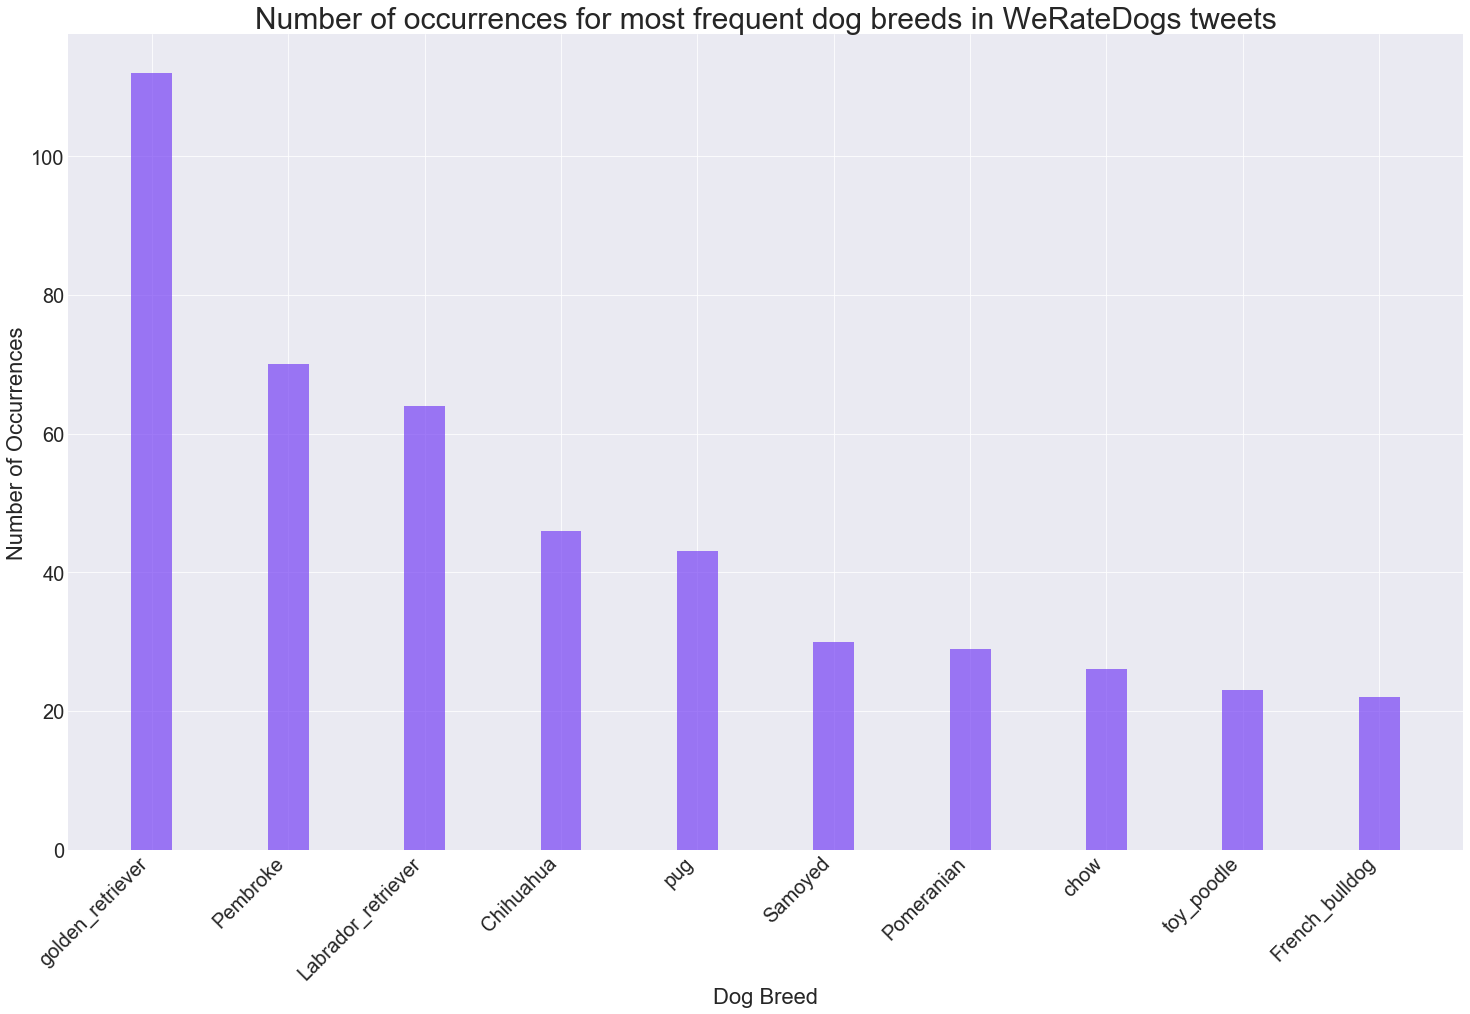

In [1024]:
# set plot labels
labels = most_frequent_breeds_counts.breed_prediction1.values.tolist()

# set bar heights
heights = most_frequent_breeds_counts.counts.values.tolist()

ind = np.arange(len(labels)) # the x locations for the groups
width = 0.3 # the width of the bars

plt.figure(figsize=(25, 15))  # width:25, height:15

# plot bars
bars = plt.bar(ind, heights, width, color='#7742f4', alpha=0.7)

# title and labels
plt.ylabel('Number of Occurrences', size=22)
plt.xlabel('Dog Breed', size=22)
plt.title('Number of occurrences for most frequent dog breeds in WeRateDogs tweets', size=30)
plt.xticks(ind, labels, size=20, ha='right', rotation=45)
plt.yticks(size=20);

This plot visually shows that golden retrievers occur most often in the tweets (based on the first image prediction) followed by Pembrokes and labrador retrievers. Now I can explore how retweet count, favorite count, and rating compare across predicted dog breeds.

In [1025]:
# subset twitter_archive_clean dataframe for these 10 breeds
most_frequent_breeds_df = twitter_archive_clean[twitter_archive_clean['breed_prediction1'].isin(most_frequent_breeds)]

# group subset by breed and get mean values for 'favorite_count' and retweet_count
breed_means = most_frequent_breeds_df.groupby('breed_prediction1').mean()[['favorite_count', 'retweet_count', 'prediction1_confidence']].reset_index()

# merge with counts table
grouped_breeds = most_frequent_breeds_counts.merge(breed_means, how='left', on = 'breed_prediction1')
grouped_breeds


,breed_prediction1,counts,favorite_count,retweet_count,prediction1_confidence
0,golden_retriever,112,12144.409091,3528.037879,0.724843
1,Pembroke,70,11304.886364,3125.829545,0.717223
2,Labrador_retriever,64,11642.085106,3772.659574,0.656606
3,Chihuahua,46,8699.538462,2813.192308,0.587447
4,pug,43,5810.277778,1784.296296,0.759223
5,Samoyed,30,13312.575000,4482.125000,0.747088
6,Pomeranian,29,7985.315789,2792.421053,0.743606
7,chow,26,9938.951220,2829.902439,0.615648
8,toy_poodle,23,6636.432432,2443.621622,0.611089
9,French_bulldog,22,18350.500000,4721.769231,0.770627


It makes sense that the average prediction 1 confidence levels are all greater than 0.5 here since I took a subset above of only tweets with a prediction 1 confidence level greater than 0.5.

I'm now ready to plot the means for each dog breed using the table I created above.

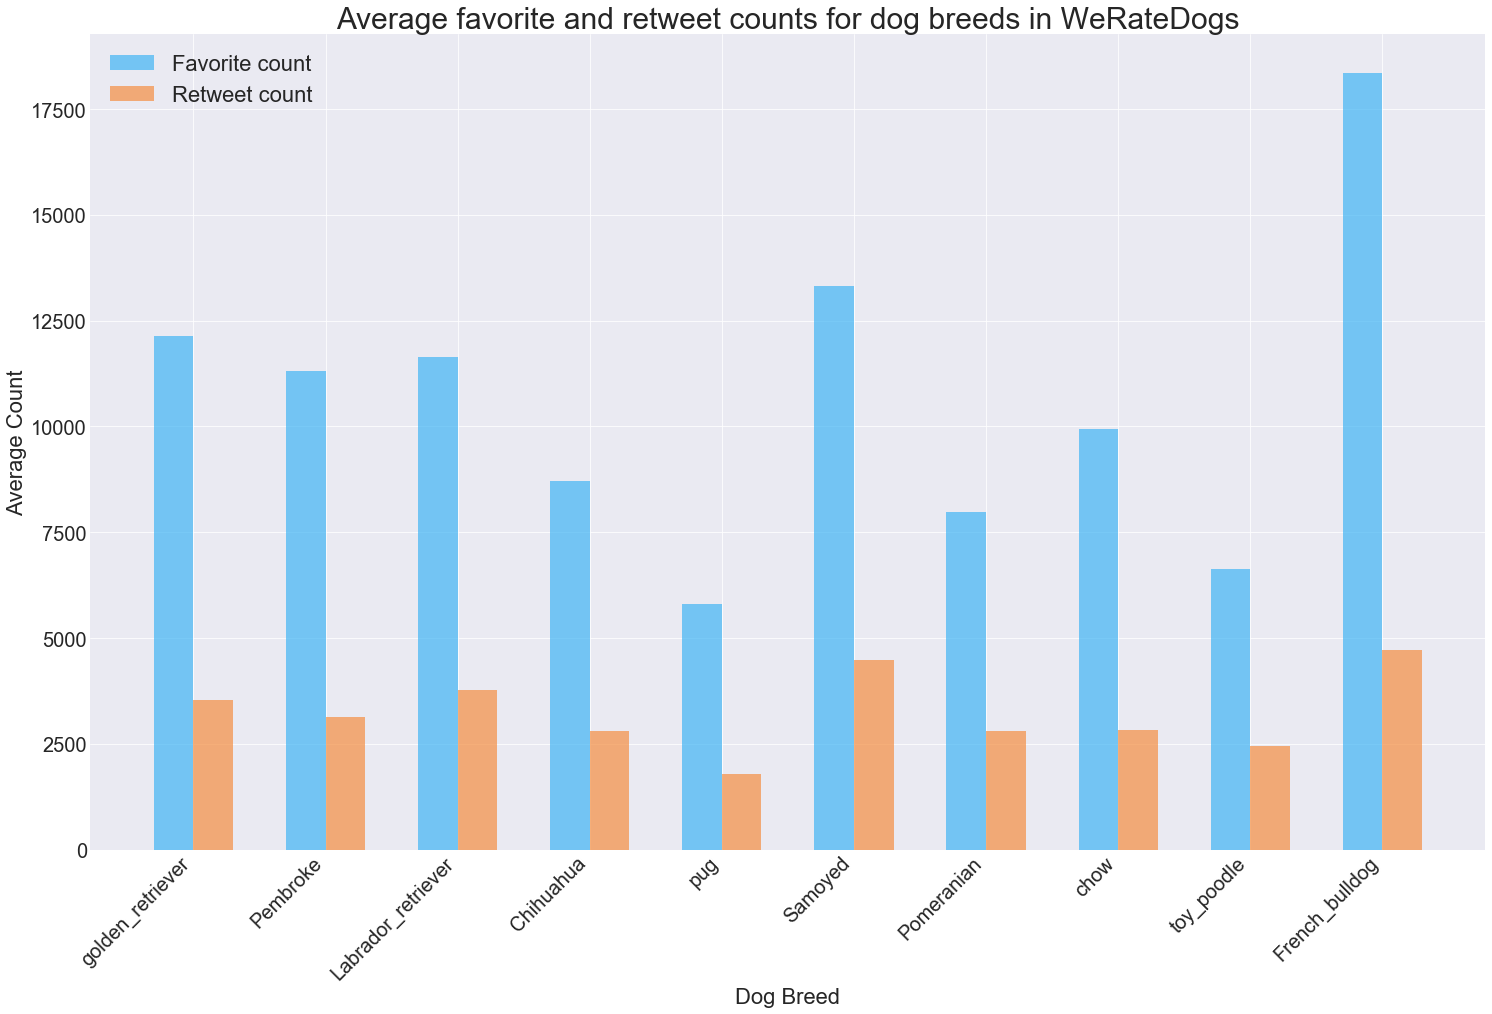

In [1026]:
# set plot labels
labels = grouped_breeds.breed_prediction1.values.tolist()

# set bar heights
favorite_means = grouped_breeds.favorite_count.values.tolist()
retweet_means = grouped_breeds.retweet_count.values.tolist()

ind = np.arange(len(labels)) # the x locations for the groups
width = 0.3 # the width of the bars

plt.figure(figsize=(25, 15))  # width:25, height:15

# plot bars
favorite_bars = plt.bar(ind, favorite_means, width, color='#41b5f4', alpha=0.7, label='Favorite count')
retweet_bars = plt.bar(ind + width, retweet_means, width, color='#f48e41', alpha=0.7, label='Retweet count')

# title and labels
plt.ylabel('Average Count', size=22)
plt.xlabel('Dog Breed', size=22)
plt.title('Average favorite and retweet counts for dog breeds in WeRateDogs', size=30)
locations = ind + width / 2  # xtick locations
plt.xticks(locations, labels, size=20, ha='right', rotation=45)
plt.yticks(size=20)

# legend
plt.legend(loc=0, prop={'size': 22});

The above plot shows that of the top 10 most frequently occurring dog breeds in the tweets, french bulldogs have the highest average favorite count, followed by Samoyed dogs. Pugs and toy poodles have the lowest average favorite counts out of these breeds. The trend appears to be the same for average retweet counts.

I now want to examine how ratings of the top 10 dog breeds (based on breed_prediction1) compare to each other, even though these are based on a funny, irregular rating system. Since numerators and denominators differ across tweets, I'll get a rating in decimal from for each tweet by dividing the numerator by the denominator.

In [1027]:
# create new column called 'rating_decimal' for most frequent breeds
most_frequent_breeds_df['rating_decimal'] = most_frequent_breeds_df.rating_numerator/most_frequent_breeds_df.rating_denominator

most_frequent_breeds_df.rating_decimal.describe()

/Users/cadpav/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


count    628.000000
mean       1.130892
std        0.298803
min        0.300000
25%        1.000000
50%        1.100000
75%        1.200000
max        7.500000
Name: rating_decimal, dtype: float64

In [1028]:
# group by breed_prediction1 and get means of rating decimal
rating_means_df = most_frequent_breeds_df.groupby('breed_prediction1').mean()['rating_decimal'].reset_index()

# merge with count table from above to be in same order
rating_means_df = most_frequent_breeds_counts.merge(rating_means_df, how='left', on = 'breed_prediction1')
rating_means_df

,breed_prediction1,counts,rating_decimal
0,golden_retriever,112,1.156818
1,Pembroke,70,1.144318
2,Labrador_retriever,64,1.112766
3,Chihuahua,46,1.069231
4,pug,43,1.024074
5,Samoyed,30,1.170000
6,Pomeranian,29,1.286842
7,chow,26,1.160976
8,toy_poodle,23,1.105405
9,French_bulldog,22,1.126923


Since the mean ratings are all just barely greater than one, I'll plot the means minus one to better see the differences.

In [1029]:
# convert rating means to list
rating_means = rating_means_df.rating_decimal.values.tolist()

rating_means_minus1 = []

# get list of ratings minus one
for mean in rating_means:
    rating_means_minus1.append(mean-1)

rating_means_minus1

[0.15681818181818108,
 0.1443181818181818,
 0.1127659574468085,
 0.06923076923076943,
 0.024074074074074137,
 0.17000000000000015,
 0.28684210526315845,
 0.16097560975609793,
 0.10540540540540566,
 0.12692307692307692]

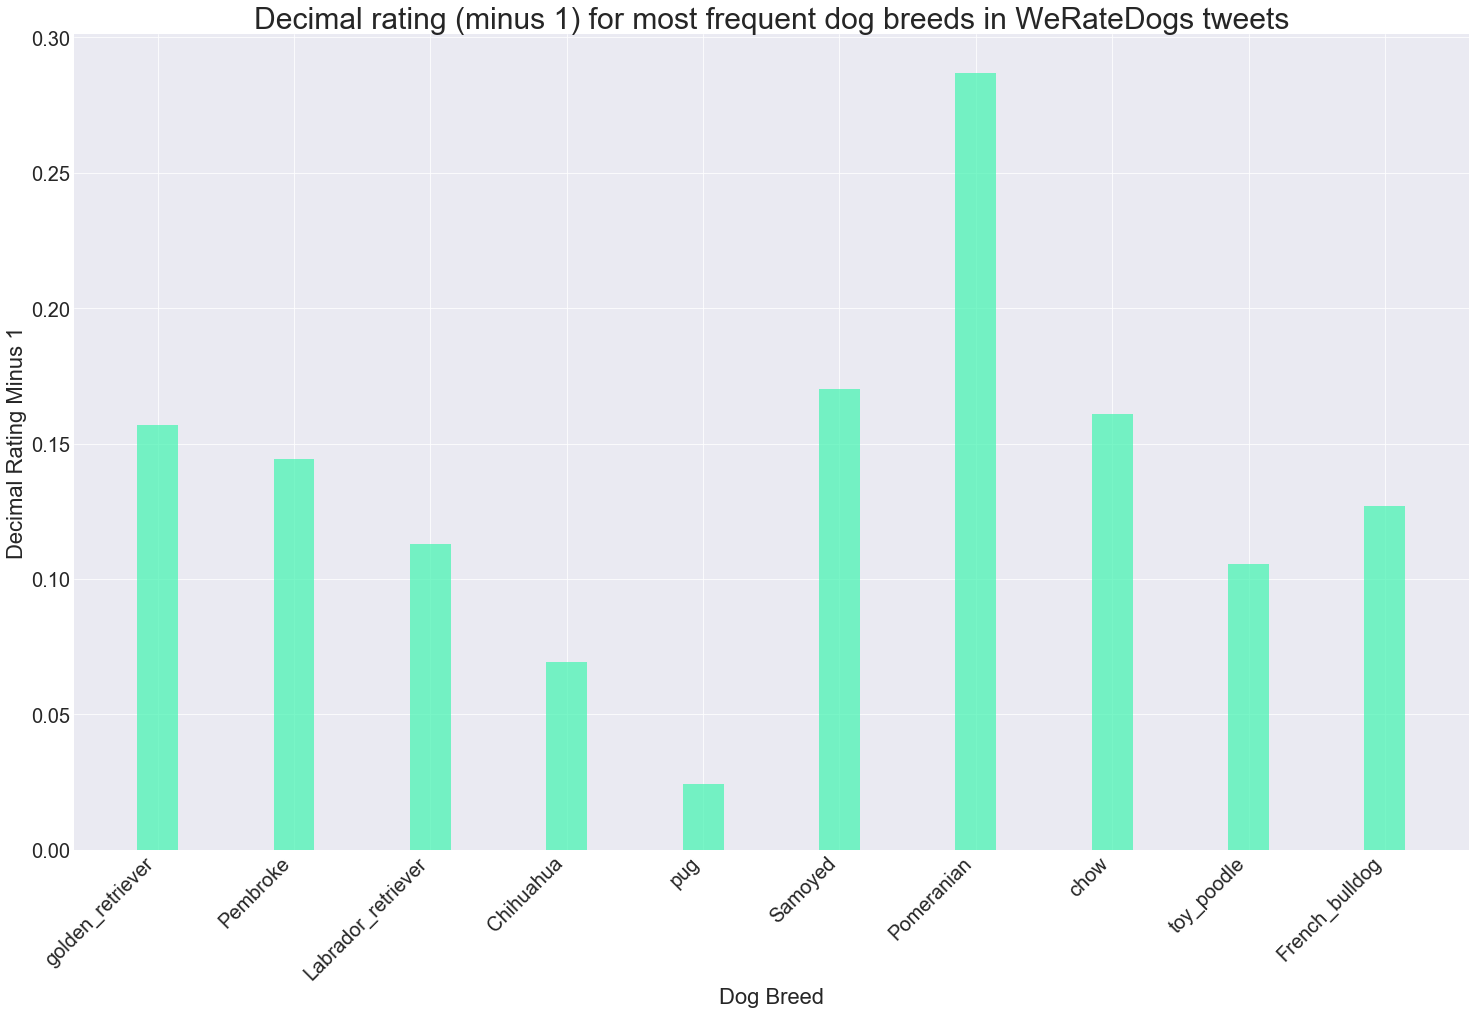

In [1030]:
# set plot labels
labels = rating_means_df.breed_prediction1.values.tolist()

# set bar heights
heights = rating_means_minus1

ind = np.arange(len(labels)) # the x locations for the groups
width = 0.3 # the width of the bars

plt.figure(figsize=(25, 15))  # width:25, height:15

# plot bars
bars = plt.bar(ind, heights, width, color='#41f4af', alpha=0.7)

# title and labels
plt.ylabel('Decimal Rating Minus 1', size=22)
plt.xlabel('Dog Breed', size=22)
plt.title('Decimal rating (minus 1) for most frequent dog breeds in WeRateDogs tweets', size=30)
plt.xticks(ind, labels, size=20, ha='right', rotation=45)
plt.yticks(size=20);

The plot above shows that predicted Pomeranians have the highest average decimal rating as provided by WeRateDogs, followed by Samoyeds. Pugs and Chihuahuas have the lowest decimal rating of the top 10 most frequently occurring breeds (based on predictions). Clearly though, these differences are minimal and all average ratings are greater than one. WeRateDogs must really love all dogs!

Now, I want to examine how favorite counts and retweet counts change over time for all of WeRateDogs tweets in general.

In [1031]:
# group twitter_archive_clean by year and month and get mean favorite counts and retweet counts
grouped_by_time = twitter_archive_clean.groupby(['year','month']).mean()[['favorite_count','retweet_count']].reset_index()
grouped_by_time.head()

,year,month,favorite_count,retweet_count
0,2015,11,1272.423729,542.908475
1,2015,12,3478.263889,1481.197222
2,2016,1,3993.813253,1499.753012
3,2016,2,4330.574074,1587.601852
4,2016,3,4540.330508,1603.372881


In [1032]:
# combine month and year into one column
grouped_by_time['month_of_year'] = grouped_by_time['month'].map(str) + '-' + grouped_by_time['year'].map(str)

grouped_by_time.head()

,year,month,favorite_count,retweet_count,month_of_year
0,2015,11,1272.423729,542.908475,11-2015
1,2015,12,3478.263889,1481.197222,12-2015
2,2016,1,3993.813253,1499.753012,1-2016
3,2016,2,4330.574074,1587.601852,2-2016
4,2016,3,4540.330508,1603.372881,3-2016


I am now ready to plot average retweet and favorite counts by month of year. 

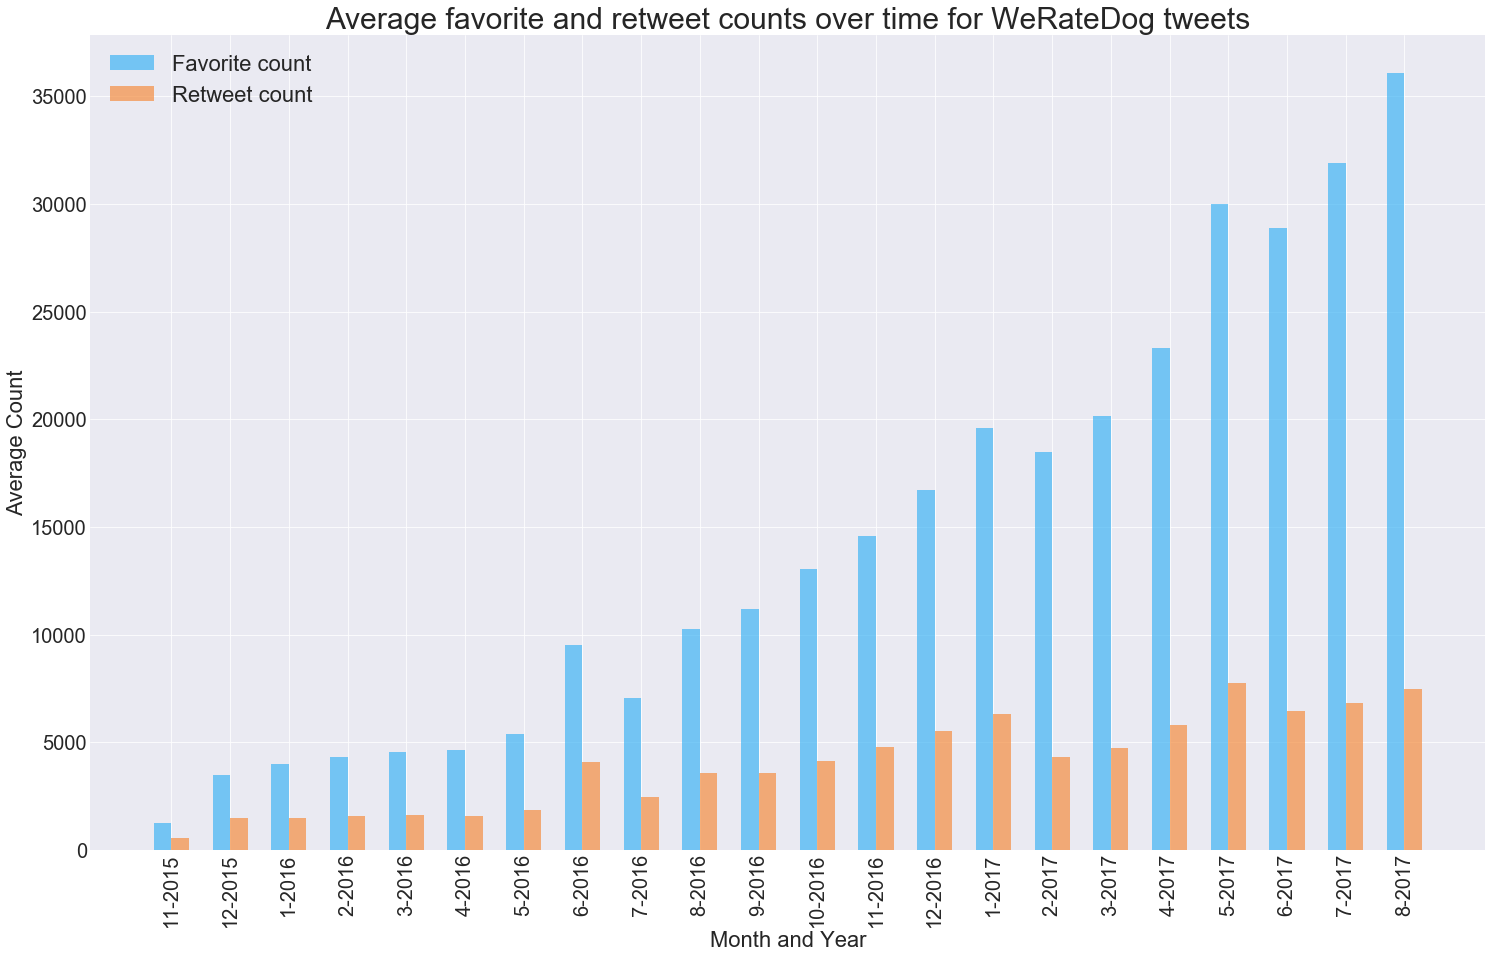

In [1033]:
# set plot labels
labels = grouped_by_time.month_of_year.values.tolist()

# set bar heights
favorite_means = grouped_by_time.favorite_count.values.tolist()
retweet_means = grouped_by_time.retweet_count.values.tolist()

ind = np.arange(len(labels)) # the x locations for the groups
width = 0.3 # the width of the bars

plt.figure(figsize=(25, 15))  # width:25, height:15

# plot bars
favorite_bars = plt.bar(ind, favorite_means, width, color='#41b5f4', alpha=0.7, label='Favorite count')
retweet_bars = plt.bar(ind + width, retweet_means, width, color='#f48e41', alpha=0.7, label='Retweet count')

# title and labels
plt.ylabel('Average Count', size=22)
plt.xlabel('Month and Year', size=22)
plt.title('Average favorite and retweet counts over time for WeRateDog tweets', size=30)
locations = ind + width / 2  # xtick locations
plt.xticks(locations, labels, size=20, ha='center', rotation=90)
plt.yticks(size=20)

# legend
plt.legend(loc=0, prop={'size': 22});

From the plot above, we can see that the monthly average for both retweet count and favorite count have increased over time since WeRateDogs first started on twitter. Interestingly there are a few spikes in both favorite counts and retweet counts in June 2016, January 2017, and May 2017.

Lastly, I want to end this exploration by creating a linear regression model to predict retweet count from favorite count for WeRateDog tweets. I noticed from plots above that retweet count and favorite count tend to follow the same pattern and therefore appear to be correlated. I'll plot a scatter plot of these variables to visualize this correlation.

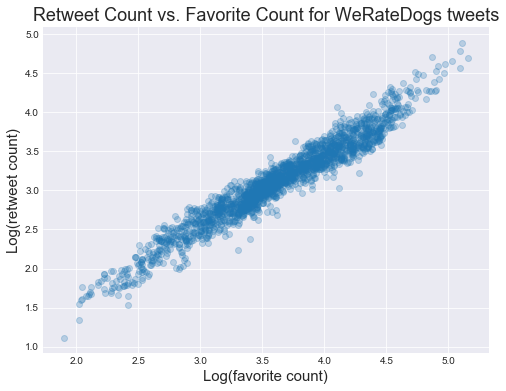

In [1034]:
import math

# definite x and y variables
log_favorite_count = twitter_archive_clean.favorite_count.apply(lambda x: math.log10(x))
log_retweet_count = twitter_archive_clean.retweet_count.apply(lambda x: math.log10(x))

plt.figure(figsize=(8, 6))  # width:8, height:6

# title and labels
plt.ylabel('Log(retweet count)', size=15)
plt.xlabel('Log(favorite count)', size=15)
plt.title('Retweet Count vs. Favorite Count for WeRateDogs tweets', size=18)

# plot scatter plot
plt.scatter(log_favorite_count, log_retweet_count, alpha=1/4);

Note, I plotted the log values of favorite count and retweet count so that my linear regression model does not produce negative values for predictions. Also, when I plot them without taking the log, variance increases across favorite count, which is a good sign that a log transformation should be used. Based on the scatter plot, retweet count and favorite count appear to have a strong linear correlation. So I'll go ahead and create a linear regresion model.

Coefficient: 
 [[0.9368976]]
Intercept: 
 [-0.28939441]
Mean squared error: 0.02
R-squared value: 0.94


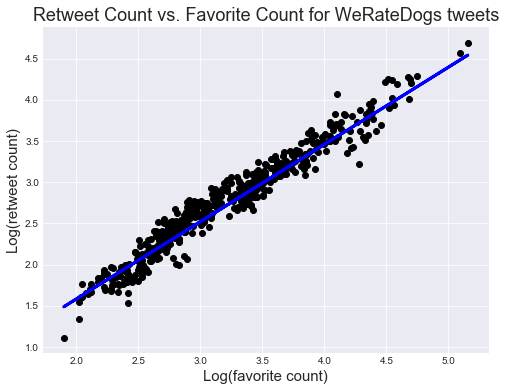

In [1035]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# use favorite count as feature
X = log_favorite_count.values.reshape(-1, 1)

# set retweet count as target
target = log_retweet_count.values.reshape(-1, 1)

# split data into training/testing sets
X_train = X[:-500]
X_test = X[-500:]

# split the targets into training/testing sets
y_train = target[:-500]
y_test = target[-500:]

# create linear regression object
lm = linear_model.LinearRegression()

# train the model using the training sets
lm.fit(X_train, y_train)

# make predictions using the testing set
y_pred = lm.predict(X_test)

# print coefficients
print('Coefficient: \n', lm.coef_)
# print intercepts
print('Intercept: \n', lm.intercept_)
# print mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# print R-squared value: 1 is perfect prediction
print('R-squared value: %.2f' % r2_score(y_test, y_pred))

# Plot outputs

plt.figure(figsize=(8, 6))  # width:8, height:6

# title and labels
plt.ylabel('Log(retweet count)', size=15)
plt.xlabel('Log(favorite count)', size=15)
plt.title('Retweet Count vs. Favorite Count for WeRateDogs tweets', size=18)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()


From the outputs above, this seems to be an effective linear model due to its high R-squared value (close to 1) and low mean squared error. This model can be used to estimate retweet counts based on a given number of favorite counts for a WeRateDogs tweet. Note, however, that this model is based on tweets up until August 2017 only and therefore may be out of date now. 